<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None
            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000
RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


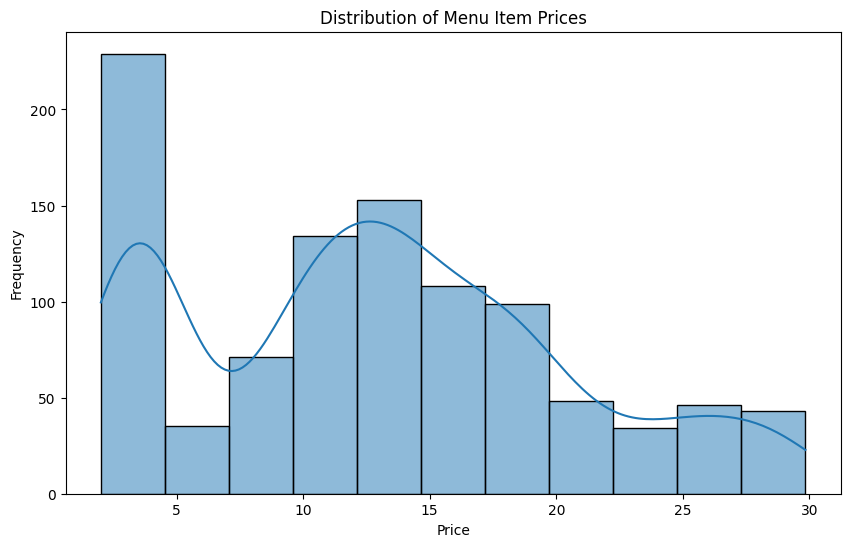

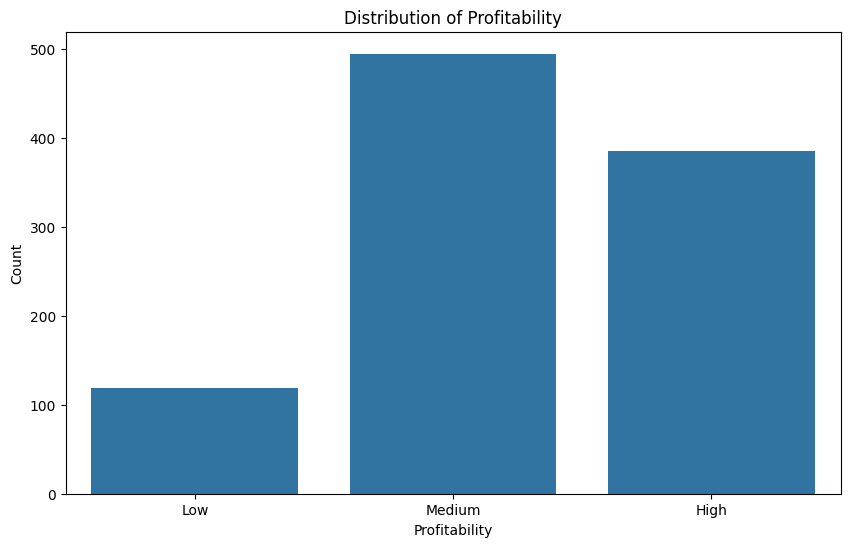

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\USER\OneDrive\Documents\Tugas&materi\Kuliah\Sem4\MPML\UAS\restaurant_menu_optimization_data.csv"

data = pd.read_csv(file_path)

# Data overview
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Menu Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize Profitability distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Profitability', data=data)
plt.title('Distribution of Profitability')
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling categorical variables
label_encoder = LabelEncoder()
data['MenuCategory'] = label_encoder.fit_transform(data['MenuCategory'])
data['Profitability'] = label_encoder.fit_transform(data['Profitability'])

# Feature scaling
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

# Display the first few rows of the processed data
print(data.head())


  RestaurantID  MenuCategory               MenuItem  \
0         R003             1                   Soda   
1         R001             0  Spinach Artichoke Dip   
2         R003             2    New York Cheesecake   
3         R003             3        Chicken Alfredo   
4         R002             3          Grilled Steak   

                                         Ingredients     Price  Profitability  
0                                   ['confidential'] -1.385057              1  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil'] -0.229045              2  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  0.788029              0  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  2.256986              0  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  0.662581              2  


In [8]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data[['MenuCategory', 'Price']]
y = data['Profitability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

# Train models
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC()

In [10]:
# Make predictions
log_reg_pred = log_reg.predict(X_test)
tree_clf_pred = tree_clf.predict(X_test)
svm_clf_pred = svm_clf.predict(X_test)

# Evaluate models
log_reg_acc = accuracy_score(y_test, log_reg_pred)
tree_clf_acc = accuracy_score(y_test, tree_clf_pred)
svm_clf_acc = accuracy_score(y_test, svm_clf_pred)

log_reg_prec = precision_score(y_test, log_reg_pred, average='weighted')
tree_clf_prec = precision_score(y_test, tree_clf_pred, average='weighted')
svm_clf_prec = precision_score(y_test, svm_clf_pred, average='weighted')

log_reg_recall = recall_score(y_test, log_reg_pred, average='weighted')
tree_clf_recall = recall_score(y_test, tree_clf_pred, average='weighted')
svm_clf_recall = recall_score(y_test, svm_clf_pred, average='weighted')

log_reg_f1 = f1_score(y_test, log_reg_pred, average='weighted')
tree_clf_f1 = f1_score(y_test, tree_clf_pred, average='weighted')
svm_clf_f1 = f1_score(y_test, svm_clf_pred, average='weighted')

# Print evaluation metrics
print(f"Logistic Regression: Accuracy = {log_reg_acc}, Precision = {log_reg_prec}, Recall = {log_reg_recall}, F1 Score = {log_reg_f1}")
print(f"Decision Tree: Accuracy = {tree_clf_acc}, Precision = {tree_clf_prec}, Recall = {tree_clf_recall}, F1 Score = {tree_clf_f1}")
print(f"SVM: Accuracy = {svm_clf_acc}, Precision = {svm_clf_prec}, Recall = {svm_clf_recall}, F1 Score = {svm_clf_f1}")

Logistic Regression: Accuracy = 0.785, Precision = 0.6899375000000001, Recall = 0.785, F1 Score = 0.7331858820779524
Decision Tree: Accuracy = 0.82, Precision = 0.8141638608305276, Recall = 0.82, F1 Score = 0.8160282936023475
SVM: Accuracy = 0.835, Precision = 0.7330828854898718, Recall = 0.835, F1 Score = 0.7800034940600977


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import joblib

# Save the decision tree model
joblib.dump(tree_clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [14]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)  # Ganti _name_ dengan __name__

# Load the model
model = joblib.load('decision_tree_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify(prediction.tolist())

if __name__ == '__main__':  # Ganti _name_ dengan __name__
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
